# **STAT 301 Final Project**

## Predicting Placement Status in Students

#### Group 35:
- Vedant Kalyani 
- Timothy Gao 
- Ryan Lowe  
- Aryan Jain

Course: STAT 301

Date: 16th April 2025

## Introduction

Securing a Job Placement after Graduation is a key concern for us students in today's compepetive job market. Many companies and recruiters assess candidates on a variety of criteria beyond just academic performance, such as soft skills, extracurricular involvement, and technical certifications. With access to data that captures a range of these attributes, it becomes valuable to explore whether we can predict placement outcomes for students based on these attributes.



So we propose the following question:  

**How can we use factors such as Academic Performance, Soft Skills, Internships, etc., to predict the likelihood of a student being placed after graduation?**


We chose this research question because it allows us to build a model that predicts the likelihood of a student being placed after graduation using relevant academic and personal factors. This approach allows us to apply predictive modeling techniques while ensuring the model can generalize well. As students who will soon be looking for placements ourselves, it will help provide students like us with more insights into improving career readiness and ensure the best chance at a placement!

## Data Description

The table below provides a summary of the dataset, including variable names, data types, and descriptions.

| **Variable**                | **Data Type** | **Description** |
|-----------------------------|-------------|-----------------------------------------------|
| StudentID                   | integer     | Student ID |
| CGPA                        | float     | Overall grades achieved by the student |
| Internships                 | integer     | Number of internships a student has done |
| Projects                    | integer     | Number of projects a student has done |
| Workshops.Certifications     | integer     | Number of online certifications/workshops completed |
| AptitudeTestScore           | integer     | Aptitude test score to assess logical thinking |
| SoftSkillsRating            | numeric     | Communication rating affecting placement chances |
| ExtracurricularActivities   | boolean     | Whether the student participated in extracurriculars |
| PlacementTraining           | boolean     | Whether the student received placement training |
| SSC_Marks                   | integer     | Senior Secondary Marks|
| HSC_Marks                   | integer     | Higher Secondary Marks |
| PlacementStatus             | boolean     | Whether a student was placed (TRUE/FALSE) |

The dataset contains student placement records with 12 variables and 10000 observations. The dataset includes academic performance features (CGPA, SSC Marks, and HSC Marks), extracurricular involvement, internships, and soft skills rating. The target variable is Placement status, which tells us whether a student was placed or not. The dataset was sourced from Kaggle: (https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data.

## EDA & Visualization

In [2]:
#Load libraries
library(tidyverse)
library(broom)
library(pROC)

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [3]:
#load the data via a github link
placement_df <- read.csv("https://raw.githubusercontent.com/Vedkal19/placement-data/main/placementdata.csv")

# Convert character columns to logical binary 1/0 for inference
placement_df <- placement_df %>%
  mutate(
    PlacementStatus = ifelse(PlacementStatus == "Placed", 1, 0),
    PlacementTraining = ifelse(PlacementTraining == "Yes", 1, 0),
    ExtracurricularActivities = ifelse(ExtracurricularActivities == "Yes", 1, 0)
  )

#Checking the structure of the dataset
str(placement_df)

#Checking for missing values
colSums(is.na(placement_df)) 

'data.frame':	10000 obs. of  12 variables:
 $ StudentID                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ CGPA                     : num  7.5 8.9 7.3 7.5 8.3 7 7.7 7.7 6.5 7.8 ...
 $ Internships              : int  1 0 1 1 1 0 1 2 1 1 ...
 $ Projects                 : int  1 3 2 1 2 2 1 1 1 3 ...
 $ Workshops.Certifications : int  1 2 2 2 2 2 1 0 0 2 ...
 $ AptitudeTestScore        : int  65 90 82 85 86 71 76 85 84 79 ...
 $ SoftSkillsRating         : num  4.4 4 4.8 4.4 4.5 4.2 4 3.5 3.9 4.4 ...
 $ ExtracurricularActivities: num  0 1 1 1 1 1 0 1 0 1 ...
 $ PlacementTraining        : num  0 1 0 1 1 0 0 1 1 1 ...
 $ SSC_Marks                : int  61 78 79 81 74 55 62 59 75 85 ...
 $ HSC_Marks                : int  79 82 80 80 88 66 65 72 71 86 ...
 $ PlacementStatus          : num  0 1 0 1 1 0 0 0 0 1 ...


StudentID                      CGPA               Internships 
                        0                         0                         0 
                 Projects  Workshops.Certifications         AptitudeTestScore 
                        0                         0                         0 
         SoftSkillsRating ExtracurricularActivities         PlacementTraining 
                        0                         0                         0 
                SSC_Marks                 HSC_Marks           PlacementStatus 
                        0                         0                         0

The dataset is already tidy:
- Each row represents one student/ observation
- Each column represents one variable
- Each cell contains a single value
- There are no missing values

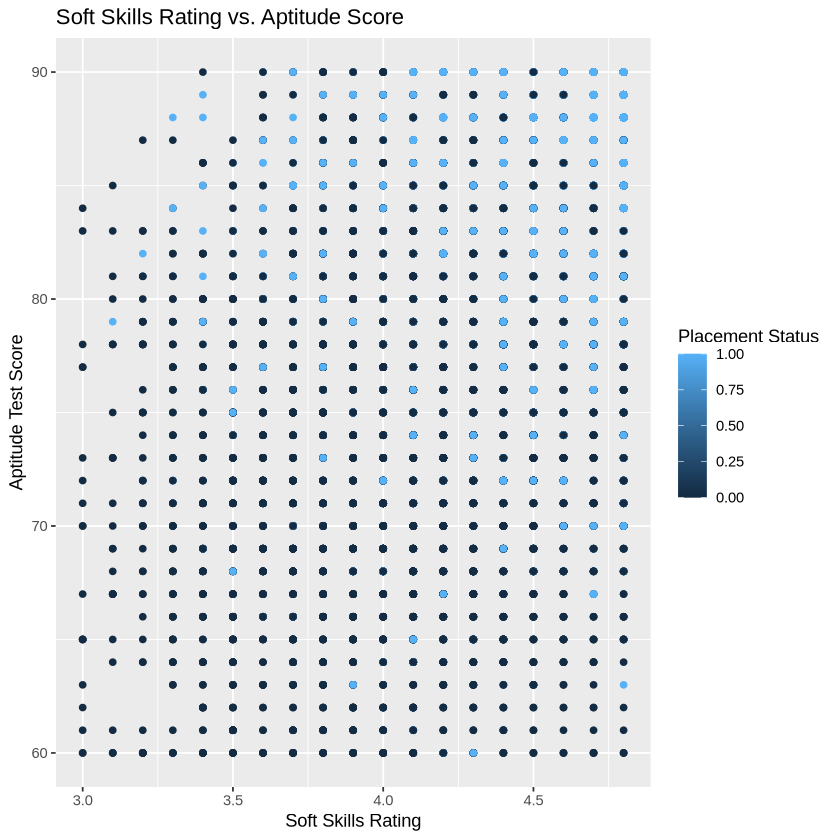

In [4]:
ggplot(placement_df, aes(x = SoftSkillsRating, y = AptitudeTestScore, color = PlacementStatus)) +
  geom_point() +
  labs(title = "Soft Skills Rating vs. Aptitude Score",
       x = "Soft Skills Rating",
       y = "Aptitude Test Score",
       color = "Placement Status")

The scatter plot above helps us explore the relationship between Soft Skills Rating, Aptitude Test Score, and Placement Status. This helps us investigate two key factors in relation to Placement Status. We can see that the students with a higher Aptitude Test score and Soft Skills rating seem to be placed more compared to students that have lower rating/ score in either feature as there is a higher density of blue dots in the top right of the graph compared to the bottom left. This helps us understand that these two factors might be quite important in predicting whether a student gets placed or not.

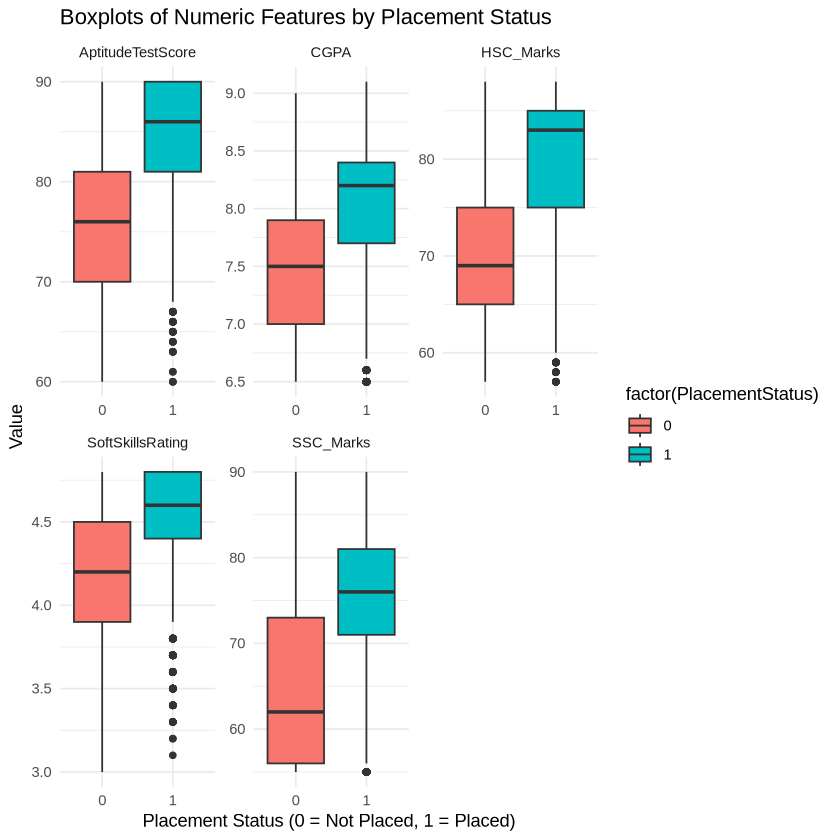

In [5]:
# Reshaping numeric explanatory variables for plotting
numeric_vars <- placement_df %>%
  select(CGPA, SoftSkillsRating, AptitudeTestScore, SSC_Marks, HSC_Marks, PlacementStatus) %>%
  pivot_longer(cols = -PlacementStatus, names_to = "Variable", values_to = "Value")

ggplot(numeric_vars, aes(x = factor(PlacementStatus), y = Value, fill = factor(PlacementStatus))) +
  geom_boxplot(alpha = 1.5, width = 0.8) +
  facet_wrap(~ Variable, scales = "free", ncol = 3) +
  labs(
    title = "Boxplots of Numeric Features by Placement Status",
    x = "Placement Status (0 = Not Placed, 1 = Placed)",
    y = "Value"
  ) +
  theme_minimal()

The boxplots above help us explore how the numeric features in the data differ for students who were placed vs students who were not placed. We can see that for HSC Marks, and Aptitude Test Score, students who had higher values have a much higher placement rate than students who have lower values. While SSC Marks, CGPA, and Soft Skills Rating don't have the same level of discreptency between high value vs low value scores, they also do show that students who scored higher in these metrics did have a slightly higher placement rate than students who scored low in these metrics. These visual differences suggest that these variables will probably be important predictors in determining Placement Status, which can guide our feature selection for building our predictive model.

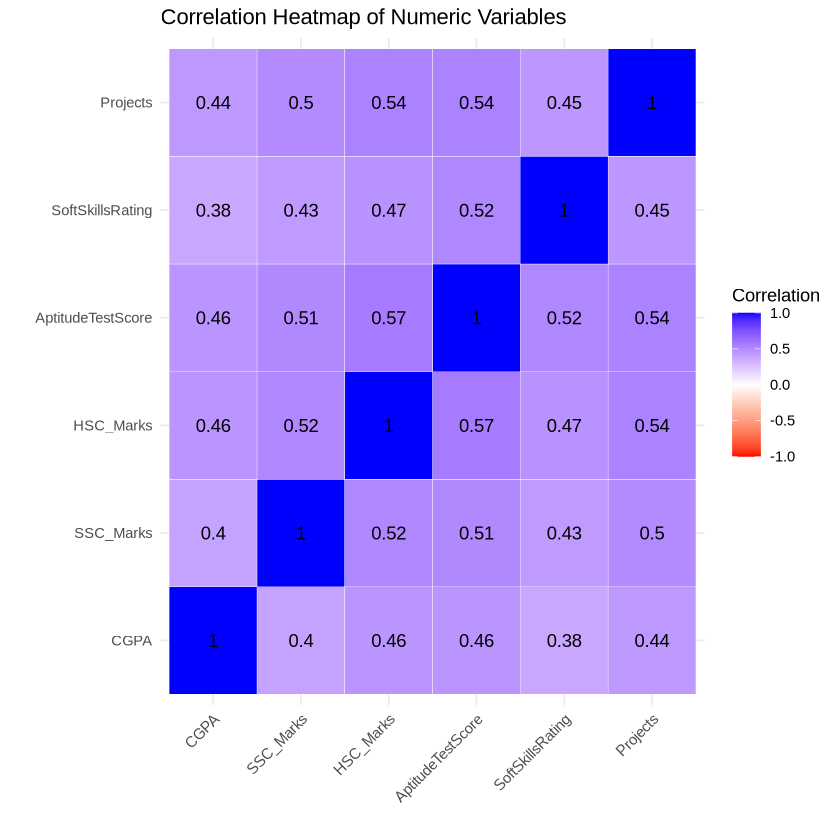

In [6]:
numeric_vars <- placement_df %>%
  select(CGPA, SSC_Marks, HSC_Marks, AptitudeTestScore, SoftSkillsRating, Projects)

cor_matrix <- round(cor(numeric_vars), 2)

# Convert to long format for ggplot
cor_long <- as.data.frame(as.table(cor_matrix))

ggplot(cor_long, aes(Var1, Var2, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq)) +
  scale_fill_gradient2(low = "red", high = "blue", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Correlation Heatmap of Numeric Variables",
       x = "", y = "")

This correlation heatmap above helps us investigate any potential multicollinearity among the numeric explanatory variables. Most of the correlations lie in the moderate range of 0.4 to 0.5, indicating that they may have some association but not extreme collinearity. The highest observed correlation is between Aptitude Test Score and HSC Mars of 0.57, which is still within a tolerable range. This reassures us that including all of these variables in the model probably won't cause multicollinearity issues, although we could confirm this with VIF if nee

## Method and Plan

#### Proposed Method:

I will use a logistic regression model to explore my research question. This model is ideal for the response variable PlacementStatus, a binary variable indicating whether or not a student got placed. The explanatory variables include academic performance (CGPA), skill-based attributes (SoftSkillsRating, AptitudeTestScore), and experience-related factors (Internships, Projects, PlacementTraining, and ExtracurricularActivities), etc.

#### Why this is an appropriate method:

Logistic regression is best suited for modelling the relationship between one or more explanatory variables and a binary response variable. It will allow us to assess how each explanatory factor is associated with the likelihood of a student being placed. We will do this by estimating odds ratios and evaluating statistical significance. This method helps us with our inference-based focus of the analysis as it will help us understand associations.

#### Assumptions required for this method:

- Each student case (observation) is independent of each other
- Log-odds of the response are linearly related to the explanatory variables
- All important variables are included in the dataset

#### Potential Limitations of this method:

- Logistic Regression only reveals association and does not reveal any causation
- May perform poorly if there is class imbalance
- Intercations and/or nonlinear effects will need to be explicitly modeled

## Computational Code and Output

term                      estimate std.error statistic p.value conf.low
1  PlacementTraining         2.460    0.085     10.59     <0.001  2.084   
2  SoftSkillsRating          2.280    0.102      8.11     <0.001  1.869   
3  ExtracurricularActivities 2.181    0.080      9.70     <0.001  1.863   
4  CGPA                      1.442    0.060      6.07     <0.001  1.282   
5  Projects                  1.287    0.045      5.65     <0.001  1.179   
6  Workshops.Certifications  1.181    0.038      4.35     <0.001  1.096   
7  AptitudeTestScore         1.072    0.006     12.52     <0.001  1.061   
8  HSC_Marks                 1.030    0.005      6.49     <0.001  1.021   
9  SSC_Marks                 1.026    0.004      6.68     <0.001  1.018   
10 Internships               0.963    0.051     -0.74     0.459   0.872   
   conf.high
1  2.908    
2  2.784    
3  2.554    
4  1.624    
5  1.405    
6  1.273    
7  1.084    
8  1.039    
9  1.033    
10 1.064

Setting levels: control = 0, case = 1

Setting direction: controls < cases



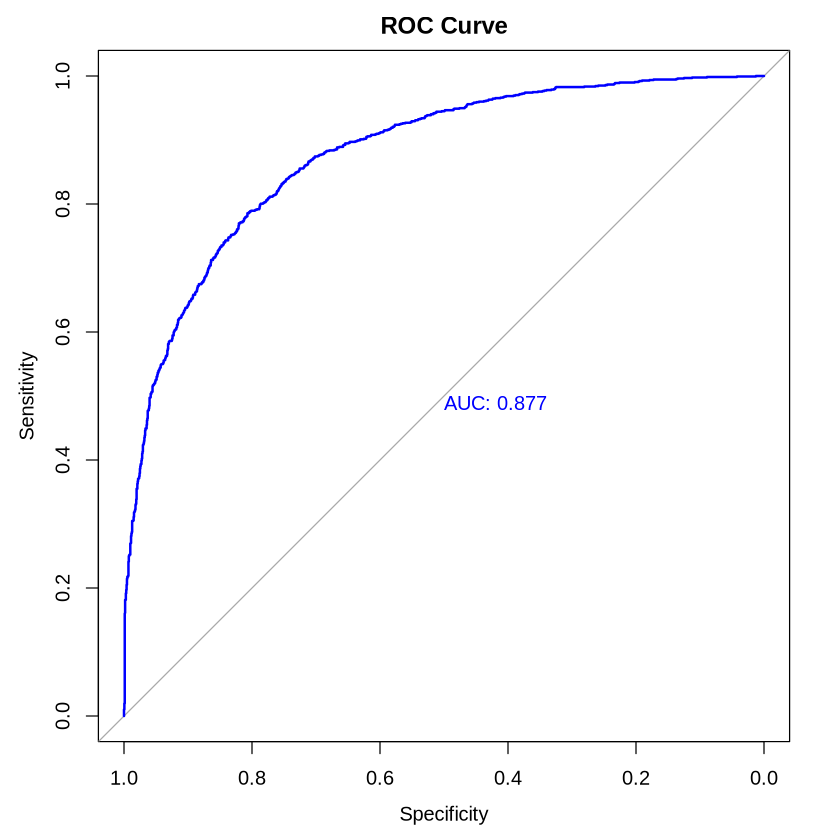

In [10]:
# Setting seed to make sure training and testing is reproducible
set.seed(2)

# Split data into train and test sets, using 70% training and 30% testing
train_df <- placement_df %>% 
    slice_sample(prop = 0.7)

test_df <- placement_df %>% 
    anti_join(train_df, by = "StudentID")

#Fitting logistic regression model to predict PlacementStatus, using all variables barring StudentID
# StudentID is excluded because it's just an identifier
full_model <- glm(PlacementStatus ~ . -StudentID, data = train_df, family = binomial)

# Tidy up the model output for easier interpretation
tidy_table <- tidy(full_model, conf.int = TRUE, exponentiate = TRUE) %>%
  filter(term != "(Intercept)") %>%
  mutate(
    p.value = case_when(
      p.value < 0.001 ~ "<0.001",
      TRUE ~ as.character(round(p.value, 3))
    ),
    estimate = round(estimate, 3),
    std.error = round(std.error, 3),
    statistic = round(statistic, 2),
    conf.low = round(conf.low, 3),
    conf.high = round(conf.high, 3)
  ) %>%
  arrange(desc(estimate))

tidy_table

# Predicting on the test set and graphing the ROC Curve
test_predictions <- predict(full_model, newdata = test_df, type = "response")
roc_curve <- roc(test_df$PlacementStatus, test_predictions)
plot(roc_curve, print.auc = TRUE, col = "blue", main = "ROC Curve")

#### Interpretation of the model and Issues:

In the full logistic regression model, PlacementTraining has the highest coefficient, indicating that it is the variable most associated with whether a student gets a placement or not. Internships is the only variable that doesn't seem to be statistically significant, which is unexpected given its assumed importance in real-world placement. This could be because very few students had more than one internship, which could have limited the model; converting Internships to a binary variable (Done at least one internship vs No internships) could help with this issue. Since all the other variables seem to be very significant, this could point to multicollinearity or overlapping effects, so we should experiment with interaction terms to help uncover some more meaningful relationships.

Based on the ROC curve and the AUC value of around 0.8777 on the test set, this indicates that the predictive performance of the model is very good.

####  Top Predictors of Placement

| Variable                    | Odds Ratio | Interpretation |
|-----------------------------|------------|----------------|
| **Placement Training**      | 2.46       | Students who completed placement training are **2.46 times more likely** to be placed than those who did not, all else equal. |
| **Soft Skills Rating**      | 2.28       | Each one-point increase in soft skills rating increases the odds of placement by **128%**. This highlights the importance of communication and interpersonal skills. |
| **Extracurricular Activities** | 2.18    | Students involved in extracurricular activities have more than **double the odds** of being placed, indicating employers value well-rounded profiles. |
| **CGPA**                    | 1.44       | Each one-point increase in CGPA raises the odds of placement by **44%** — academic performance is a strong but not exclusive predictor. |
| **Projects & Certifications**| 1.29–1.18 | Completing more projects and certifications moderately improves placement chances. |
| **Aptitude Test Score**     | 1.07       | Every additional point on the aptitude test increases odds of placement by **7%**. A small but consistent positive effect. |
| **HSC / SSC Marks**         | 1.03       | Higher secondary and senior secondary marks show a modest association with increased placement odds. |

---

####  Non-Significant Predictor

| Variable     | Odds Ratio | p-value |
|--------------|------------|---------|
| **Internships** | 0.96     | 0.459   |

> Despite expectations, internships were **not statistically significant** in predicting placement. This could be due to limited variation (most students had 0 or 1) or multicollinearity with other profile features.

---

####  ROC Curve and Model Performance

- The ROC curve yielded an AUC greater than 0.8.
- This indicates the model has **strong classification power** in distinguishing between students who are placed and not placed.

---

####  Key Takeaway

> While academic excellence matters, the results reveal that **soft skills, training programs, and extracurriculars** have even greater impact on placement outcomes. Students should aim for a balanced profile that reflects both intellectual and interpersonal capabilities.

#### Discussion

The factors that have the most influence on getting an internship are placement training, soft skills training, and extracurricular activities, which suggests that non-academic factors are important in being employable. This implies that while grades are important, getting placement training, improving soft skills and participating in extracurricular activities has more of an impact.

The model could be improved by exploring the possible effects of adding interaction terms, or turning the internship variable into a binary variable to represent whether a student has done an internship before or not.

Future questions and research could expand on this by looking at some other variables such as interview feedback or going more in depth on internships and elaborating on the type of internship for more effective prediction.